- I believe RMSE is not a very important value in CLASSIFICATION. We should look more at accuracy and F1

# INDEX
- 1) Test methods individually by hand to see errors in them - **OKAY**
- 2) Apply cross validtion to see if results are consistent with only one run of the method (done in 1)) - **OKAY**
- 3) Find good hyperparameters for each method "automatically" using cross validation - **OKAY**
- 4) Feature modification and compare results with previous runs
- 5) Add new feature modification (logs and 3 groups of -999s maybe)


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from functions import *
dirname = os.path.dirname('__file__')
DATA_TRAIN_PATH = os.path.join(dirname, 'data/train.csv')
y, tx, ids = load_csv_data(DATA_TRAIN_PATH)

# 1) Tested methods with different parameters by hand and in cross validation. I want good accuracy mainly
- **least_squares_GD:** the more iters the greater the rmse error, gamma should be around 1e-6, initial weights better if ones than zeros. F1 ~ 0.41 and A ~ 0.63 . Cross validation is consistent. rmse is in the order of 5e63. With large gammas (1e-5 and 20 maxiters) it breaks. Later i got better results with zeros. Mystery.

- **least_squares_SGD:** for big gammas (0.1) and many iters (80) the SGD gives an invalid value for matmul, i dunno why. Accuracy, F1 and rmse change a lot depending on the run without changing the parameters, between 0.36 an 0.65 the accuracy is jumping, so doesnt look very reliable, you can really see it in the cross validation accuracy prints. rmse is in the order of 5e56

- **least_squares:** very nice. Gives F1 ~ 0.57 and accuracy ~ 0.74 always, as can be seen in the cross validation prints. rmse is 0.82.

- **ridge_regression:** when the penalization is small you get higher values for F1 and accuracy~0.74 (lambda=0.01) but when they are bigger (lambda=1000), the results get a liiittle bit worse: accuracy around 0.69 and F1 also falls from 0.53 to 0.31. In this method rmse is very small, around 0.85. Same for cross validation.

- **logistic_regression_gd:** gamma desnt do anthing interesting, neither does iters or the initial weights. F1~ 0.36 and acc~0.66. the rmse_lr is 4e4 *negative* btw. Sometimes there is a warning that "there is an overflow in the sigmoid function" but then you run it again and disappears. Cross validation has the same results approx. 

- **logistic_regression_reg:** the gamma doesnt do much, but lamda decreases the accuracy from 0.66 to 0.31 when going from lambda=0.1 to 100. initial weights dont do anything, or maxiters. F1 gets higher with higher lambdas, from 0.36 to 0.4. The rmse is positive 1e17. Cross-v says the same.


In [2]:
w, loss = least_squares_GD(y, tx, np.zeros(tx.shape[1]), 20, 0.0000001)
y_pred = predict_labels(w, tx)
f1_value = f1(y, y_pred)
acc_value = accuracy(y, y_pred)

Gradient Descent: RMSE is  0.9257609262143314
TP =  31895 ; FP =  36047 ; TN =  128286 ; FN =  53772
F1 = 0.4152751466385433
Accuracy = 0.640724


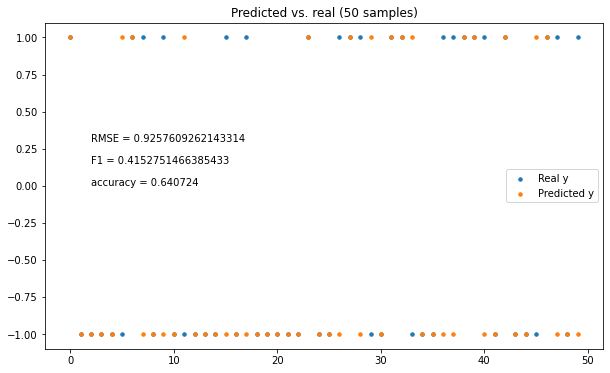

In [3]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
first_obser = range(50)

ax.scatter(first_obser,y[0:50],s=12, label='Real y')
ax.scatter(first_obser,y_pred[0:50],s=12, label='Predicted y')
ax.title.set_text('Predicted vs. real (50 samples)')
ax.text(2,0.3,'RMSE = '+str(loss))
ax.text(2,0.15, 'F1 = '+ str(f1_value))
ax.text(2,0,'accuracy = '+str(acc_value))
leg = ax.legend();
plt.show()

# 2) Cross validation returns 
- weights
- rmse train
- rmse test
- F1
- Accuracy

In [4]:
call_cross_validation(y, tx, k=3, degree=0, seed=2, opt_method=least_squares_GD, initial_w=np.zeros(tx.shape[1]), max_iters=20, gamma=0.0000001, lambda_=10)

least_squares_GD
Gradient Descent: RMSE is  0.9252855277872006
TP =  10620 ; FP =  11868 ; TN =  42754 ; FN =  18091
F1 = 0.4148518525752456
Accuracy = 0.6404905619622479
least_squares_GD
Gradient Descent: RMSE is  0.9196576186861931
TP =  10457 ; FP =  11562 ; TN =  43260 ; FN =  18054
F1 = 0.41389273698792794
Accuracy = 0.6446065784263137
least_squares_GD
Gradient Descent: RMSE is  0.9163789751404355
TP =  10117 ; FP =  10666 ; TN =  44206 ; FN =  18344
F1 = 0.4108926975875233
Accuracy = 0.65187860751443


(array([ 2.96711804e-04, -6.73703245e-05, -2.50251700e-05,  6.21244594e-06,
         2.58185666e-05,  1.33227125e-04,  2.40275912e-05, -3.18605782e-07,
        -1.36981271e-05, -4.33574002e-05, -1.33766231e-06,  1.05613242e-06,
         2.55669948e-05,  1.38999875e-05, -6.92477024e-09, -4.53202826e-08,
        -2.11737336e-05, -1.01552425e-08,  3.41750237e-08, -1.54538851e-05,
         6.19097712e-08, -6.19539472e-05, -6.44260657e-07,  4.54386679e-05,
         5.22359293e-05,  5.22250359e-05,  1.06774545e-05,  2.54787070e-05,
         2.54526048e-05, -3.60836438e-05]),
 0.9204407072046097,
 0.9204584531882829,
 0.4132124290502323,
 0.6456585826343305)

# 3) Find good hyperparameters automatically, i didnt do initial weights 

# gradient descent: max_iters, gamma

In [5]:
lambdas = [0]
gammas = [1e-9,1e-7,1e-6]
degrees = [0]
max_iterations =  [1,5,10,15,20]
pd_filled_GD = hyperparameter_tuning(y,tx,3,2,least_squares_GD,np.ones(tx.shape[1]),max_iterations,degrees,gammas,lambdas)


least_squares_GD
Gradient Descent: RMSE is  7073.799149065223
TP =  10900 ; FP =  13270 ; TN =  41501 ; FN =  17662
F1 = 0.41341121140863235
Accuracy = 0.628814515258061
least_squares_GD
Gradient Descent: RMSE is  7027.603459436424
TP =  10831 ; FP =  13188 ; TN =  41442 ; FN =  17872
F1 = 0.41087212169492815
Accuracy = 0.6272785091140365
least_squares_GD
Gradient Descent: RMSE is  6988.766873575717
TP =  10714 ; FP =  13261 ; TN =  41556 ; FN =  17802
F1 = 0.4082223619287116
Accuracy = 0.6272425089700359
least_squares_GD
Gradient Descent: RMSE is  6792.339321836863
TP =  10852 ; FP =  13178 ; TN =  41634 ; FN =  17669
F1 = 0.41300831573138475
Accuracy = 0.6298345193380773
least_squares_GD
Gradient Descent: RMSE is  6606.653420144824
TP =  10664 ; FP =  13258 ; TN =  41605 ; FN =  17806
F1 = 0.4070850511528478
Accuracy = 0.6272305089220357
least_squares_GD
Gradient Descent: RMSE is  6426.221767459108
TP =  10970 ; FP =  13184 ; TN =  41478 ; FN =  17701
F1 = 0.4153336488405111
Accuracy

In [6]:
#find parameters that maximize accuracy
pd.DataFrame(pd_filled_GD.loc[pd_filled_GD['acc'].idxmax()])


,12
acc,0.631511
degree,0
f1,0.413789
gamma,1e-06
lambda,0
max_iters,10
out_w,"[7.186065815746415e+26, -3.6071519968455206e+2..."
rmse_te,1.5443e+31
rmse_tr,1.54344e+31


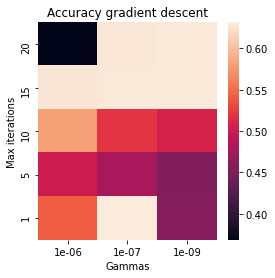

In [7]:
accuracies = list(pd_filled_GD['acc'].values) 
paint=np.zeros((len(max_iterations),len(gammas)))
k = -1
for i in range(len(max_iterations)):
    for j in range(len(gammas)):
        paint[i][j]=accuracies[k]
        k+=1
plt.figure(figsize=(4,4))
sns.heatmap(paint,xticklabels=gammas[::-1], yticklabels=max_iterations[::-1])
plt.xlabel('Gammas')
plt.ylabel('Max iterations')
plt.title('Accuracy gradient descent')
plt.show()

In [8]:
#find parameters that maximize F1
pd.DataFrame(pd_filled_GD.loc[pd_filled_GD['f1'].idxmax()])

,7
acc,0.507694
degree,0
f1,0.535858
gamma,1e-07
lambda,0
max_iters,10
out_w,"[0.32177005410035997, 1.0016773496582472, 0.93..."
rmse_te,506.862
rmse_tr,506.367


In [9]:
#find parameters that minimize rmse_train
pd.DataFrame(pd_filled_GD.loc[pd_filled_GD['rmse_tr'].idxmin()])

,10
acc,0.455306
degree,0
f1,0.392923
gamma,1e-06
lambda,0
max_iters,1
out_w,"[0.04820235159514576, 0.9312621446512511, 0.78..."
rmse_te,180.373
rmse_tr,180.782


In [10]:
#find parameters that minimize rmse_test
pd.DataFrame(pd_filled_GD.loc[pd_filled_GD['rmse_te'].idxmin()])

,10
acc,0.455306
degree,0
f1,0.392923
gamma,1e-06
lambda,0
max_iters,1
out_w,"[0.04820235159514576, 0.9312621446512511, 0.78..."
rmse_te,180.373
rmse_tr,180.782


# stochastic gradient descent: max_iters, gamma


In [11]:
lambdas = [0]
gammas = [1e-9, 1e-7, 1e-6]
degrees = [0]
max_iterations =  [10,20]
pd_filled_SGD = hyperparameter_tuning(y,tx,3,2,least_squares_SGD,np.ones(tx.shape[1]),max_iterations,degrees,gammas,lambdas)


least_squares_SGD
Stochastic Gradient Descent: RMSE is  5745.0905396672
TP =  10812 ; FP =  13314 ; TN =  41435 ; FN =  17772
F1 = 0.4102447353443369
Accuracy = 0.6269665078660315
least_squares_SGD
Stochastic Gradient Descent: RMSE is  5449.229183706126
TP =  10753 ; FP =  13149 ; TN =  41678 ; FN =  17753
F1 = 0.4103571973744467
Accuracy = 0.6291745166980668
least_squares_SGD
Stochastic Gradient Descent: RMSE is  4862.330570828235
TP =  10838 ; FP =  13162 ; TN =  41735 ; FN =  17598
F1 = 0.4133801205278816
Accuracy = 0.630878523514094
least_squares_SGD
Stochastic Gradient Descent: RMSE is  6854.130225901818
TP =  10797 ; FP =  13182 ; TN =  41417 ; FN =  17937
F1 = 0.4096522679414945
Accuracy = 0.6265705062820252
least_squares_SGD
Stochastic Gradient Descent: RMSE is  6048.889282340766
TP =  10837 ; FP =  13221 ; TN =  41468 ; FN =  17807
F1 = 0.4112557398201207
Accuracy = 0.6276625106500426
least_squares_SGD
Stochastic Gradient Descent: RMSE is  6363.089399140552
TP =  10888 ; FP = 

In [12]:
#find parameters that maximize accuracy
pd.DataFrame(pd_filled_SGD.loc[pd_filled_SGD['acc'].idxmax()])

,0
acc,0.629007
degree,0
f1,0.411327
gamma,1e-09
lambda,0
max_iters,10
out_w,"[0.9981815923242666, 1.0096110214644962, 1.013..."
rmse_te,6204.57
rmse_tr,5352.22


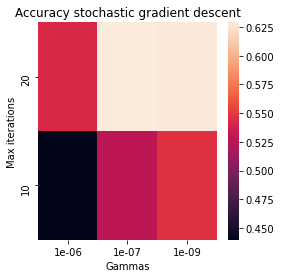

In [13]:
accuracies = list(pd_filled_SGD['acc'].values) 
paint=np.zeros((len(max_iterations),len(gammas)))
k = -1
for i in range(len(max_iterations)):
    for j in range(len(gammas)):
        paint[i][j]=accuracies[k]
        k+=1
plt.figure(figsize=(4,4))
sns.heatmap(paint,xticklabels=gammas[::-1], yticklabels=max_iterations[::-1])
plt.xlabel('Gammas')
plt.ylabel('Max iterations')
plt.title('Accuracy stochastic gradient descent')
plt.show()

# least squares: nothing



In [14]:
lambdas = [0]
gammas = [0]
degrees = [0]
max_iterations =  [0]
pd_filled_LS = hyperparameter_tuning(y,tx,3,2,least_squares,np.ones(tx.shape[1]),max_iterations,degrees,gammas,lambdas)


least_squares
Least squares: RMSE is  0.8236501712263041
TP =  13934 ; FP =  6892 ; TN =  47871 ; FN =  14636
F1 = 0.5641752368612843
Accuracy = 0.7416629666518666
least_squares
Least squares: RMSE is  0.8239615512140147
TP =  13958 ; FP =  6867 ; TN =  48030 ; FN =  14478
F1 = 0.5666957633827978
Accuracy = 0.7438589754359017
least_squares
Least squares: RMSE is  0.8236304812160452
TP =  13964 ; FP =  6945 ; TN =  47892 ; FN =  14532
F1 = 0.5652869142799312
Accuracy = 0.7422749690998764


In [15]:
#find parameters that maximize accuracy
pd.DataFrame(pd_filled_LS.loc[pd_filled_LS['acc'].idxmax()])

,0
acc,0.742599
degree,0
f1,0.565386
gamma,0
lambda,0
max_iters,0
out_w,"[7.941543940587693e-05, -0.007244968849194809,..."
rmse_te,0.825355
rmse_tr,0.823747


# ridge regression: lambda_


In [16]:
lambdas = [0.1,0.5,1,10,20]
gammas = [0]
degrees = [0]
max_iterations =  [0]
pd_filled_RR = hyperparameter_tuning(y,tx,3,2,ridge_regression,np.ones(tx.shape[1]),max_iterations,degrees,gammas,lambdas)

ridge_regression
Ridge Regression: RMSE is  0.8315887650904659
TP =  13550 ; FP =  6956 ; TN =  47982 ; FN =  14845
F1 = 0.5541808960961944
Accuracy = 0.7383869535478141
ridge_regression
Ridge Regression: RMSE is  0.8307139316558719
TP =  13621 ; FP =  6852 ; TN =  47810 ; FN =  15050
F1 = 0.5543301318573987
Accuracy = 0.7371749486997948
ridge_regression
Ridge Regression: RMSE is  0.831139620607131
TP =  13614 ; FP =  6686 ; TN =  47892 ; FN =  15141
F1 = 0.5550504535725206
Accuracy = 0.7380749522998092
ridge_regression
Ridge Regression: RMSE is  0.8381118245808529
TP =  13140 ; FP =  6689 ; TN =  47926 ; FN =  15578
F1 = 0.5413310812202609
Accuracy = 0.7327949311797247
ridge_regression
Ridge Regression: RMSE is  0.8387551345133263
TP =  13131 ; FP =  6620 ; TN =  48122 ; FN =  15460
F1 = 0.5432543130197345
Accuracy = 0.7350389401557607
ridge_regression
Ridge Regression: RMSE is  0.8384860690638121
TP =  13225 ; FP =  6770 ; TN =  47979 ; FN =  15359
F1 = 0.5444739496490253
Accuracy = 

In [17]:
#find parameters that maximize accuracy
pd.DataFrame(pd_filled_RR.loc[pd_filled_RR['acc'].idxmax()])

,0
acc,0.737879
degree,0
f1,0.55452
gamma,0
lambda,0.1
max_iters,0
out_w,"[0.000199646307917533, -0.008423971362052939, ..."
rmse_te,0.831841
rmse_tr,0.831147


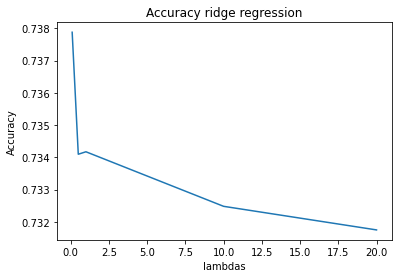

In [18]:
accuracies = list(pd_filled_RR['acc'].values) 
plt.plot(lambdas,accuracies)
plt.ylabel('Accuracy')
plt.xlabel('lambdas')
plt.title('Accuracy ridge regression')
plt.show()

# logistic regression gradient descent: max_iters, gamma


In [19]:
lambdas = [0]
gammas = [1e-9,1e-7,1e-6,1e-5]
degrees = [0]
max_iterations =  [10,15,30]
pd_filled_LRGD = hyperparameter_tuning(y,tx,3,2,logistic_regression_gd,np.ones(tx.shape[1]),max_iterations,degrees,gammas,lambdas)

logistic_regression_gd


C:\Users\soria\Google Drive\Machine Learning\project1\tomas_v1\Machine-learning-main\functions.py:133: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-t))


GD Logistic Regression: RMSE is  52207.85692335421
TP =  10793 ; FP =  13060 ; TN =  41689 ; FN =  17791
F1 = 0.41165589183210327
Accuracy = 0.6297865191460765
logistic_regression_gd
GD Logistic Regression: RMSE is  36755.18835483538
TP =  10855 ; FP =  12661 ; TN =  42081 ; FN =  17736
F1 = 0.41664267756731344
Accuracy = 0.6352345409381638
logistic_regression_gd
GD Logistic Regression: RMSE is  14516.811000611633
TP =  10766 ; FP =  12615 ; TN =  42134 ; FN =  17818
F1 = 0.4143558164148947
Accuracy = 0.6348025392101568
logistic_regression_gd
GD Logistic Regression: RMSE is  7145.674200528767
TP =  10818 ; FP =  12301 ; TN =  42441 ; FN =  17773
F1 = 0.41841036549990335
Accuracy = 0.6391105564422258
logistic_regression_gd
GD Logistic Regression: RMSE is  -6218.025883975555
TP =  10736 ; FP =  12338 ; TN =  42411 ; FN =  17848
F1 = 0.4156568198536528
Accuracy = 0.6377665510662043
logistic_regression_gd
GD Logistic Regression: RMSE is  -4476.555932679446
TP =  10800 ; FP =  12185 ; TN = 

In [20]:
#find parameters that maximize accuracy
pd.DataFrame(pd_filled_LRGD.loc[pd_filled_LRGD['acc'].idxmax()])

,11
acc,0.664819
degree,0
f1,0.365146
gamma,1e-05
lambda,0
max_iters,30
out_w,"[26682.353045998436, -10212.347568627823, -123..."
rmse_te,4.89575e+08
rmse_tr,-326691


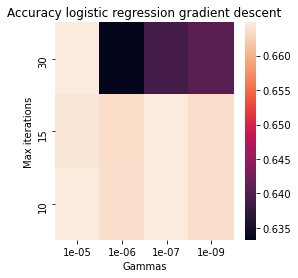

In [21]:
accuracies = list(pd_filled_LRGD['acc'].values) 
paint=np.zeros((len(max_iterations),len(gammas)))
k = -1
for i in range(len(max_iterations)):
    for j in range(len(gammas)):
        paint[i][j]=accuracies[k]
        k+=1
plt.figure(figsize=(4,4))
sns.heatmap(paint,xticklabels=gammas[::-1], yticklabels=max_iterations[::-1])
plt.xlabel('Gammas')
plt.ylabel('Max iterations')
plt.title('Accuracy logistic regression gradient descent')
plt.show()

# regularized logistic regression: max_iters, gamma, lambda_


In [22]:
lambdas = [0.1,1,100]
gammas = [1e-9,1e-7,1e-5]
degrees = [0]
max_iterations =  [10,20,30]
pd_filled_LRRR = hyperparameter_tuning(y,tx,3,2,logistic_regression_reg,np.ones(tx.shape[1]),max_iterations,degrees,gammas,lambdas)

logistic_regression_reg


C:\Users\soria\Google Drive\Machine Learning\project1\tomas_v1\Machine-learning-main\functions.py:133: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-t))


Reg Logistic Regression: RMSE is  52211.70736221329
TP =  10793 ; FP =  13060 ; TN =  41689 ; FN =  17791
F1 = 0.41165589183210327
Accuracy = 0.6297865191460765
logistic_regression_reg
Reg Logistic Regression: RMSE is  36760.25429983547
TP =  10855 ; FP =  12661 ; TN =  42081 ; FN =  17736
F1 = 0.41664267756731344
Accuracy = 0.6352345409381638
logistic_regression_reg
Reg Logistic Regression: RMSE is  14523.473139588923
TP =  10766 ; FP =  12615 ; TN =  42134 ; FN =  17818
F1 = 0.4143558164148947
Accuracy = 0.6348025392101568
logistic_regression_reg
Reg Logistic Regression: RMSE is  4252.254389494435
TP =  10810 ; FP =  12271 ; TN =  42471 ; FN =  17781
F1 = 0.4184084223564019
Accuracy = 0.63937455749823
logistic_regression_reg
Reg Logistic Regression: RMSE is  -9080.359411712625
TP =  10732 ; FP =  12309 ; TN =  42440 ; FN =  17852
F1 = 0.4157675544794189
Accuracy = 0.6380665522662091
logistic_regression_reg
Reg Logistic Regression: RMSE is  -6875.327137089888
TP =  10793 ; FP =  12159

Reg Logistic Regression: RMSE is  68879405416.21431
TP =  8079 ; FP =  7339 ; TN =  47403 ; FN =  20512
F1 = 0.3671521734190734
Accuracy = 0.6657866631466526
logistic_regression_reg
Reg Logistic Regression: RMSE is  76169250481.96101
TP =  7944 ; FP =  7459 ; TN =  47290 ; FN =  20640
F1 = 0.3611976265714871
Accuracy = 0.662810651242605
logistic_regression_reg
Reg Logistic Regression: RMSE is  83783140839.694
TP =  8078 ; FP =  7339 ; TN =  47403 ; FN =  20513
F1 = 0.36711506998727506
Accuracy = 0.6657746630986524
logistic_regression_reg
Reg Logistic Regression: RMSE is  100183321316.5952
TP =  7944 ; FP =  7461 ; TN =  47288 ; FN =  20640
F1 = 0.3611812043920071
Accuracy = 0.6627866511466046
logistic_regression_reg
Reg Logistic Regression: RMSE is  117943729191.7967
TP =  8078 ; FP =  7337 ; TN =  47405 ; FN =  20513
F1 = 0.36713175476071447
Accuracy = 0.6657986631946528
logistic_regression_reg
Reg Logistic Regression: RMSE is  137249562741.43605
TP =  7944 ; FP =  7460 ; TN =  47289 

In [23]:
#find parameters that maximize accuracy
pd.DataFrame(pd_filled_LRRR.loc[pd_filled_LRRR['acc'].idxmax()])

,7
acc,0.664811
degree,0
f1,0.365121
gamma,1e-05
lambda,0.1
max_iters,20
out_w,"[13373.432657336705, -5118.697492643271, -6190..."
rmse_te,2.29562e+08
rmse_tr,9.96334e+08


# 4) Feature modification and compare results with previous runs


Only doing the example for the best case, ridge regression accuracy  ~ 0.74. Could have also been least squares, which is similar

In [25]:
# MANIPULATE MISSING VALUES

In [26]:
tx_999 = manipulate_missing_values(tx)

In [29]:
tx_999.shape

(250000, 30)

In [28]:
lambdas = [0.5,1,10,20]
gammas = [0]
degrees = [0]
max_iterations =  [0]
pd_filled_RR = hyperparameter_tuning(y,tx_999,3,2,ridge_regression,np.ones(tx_999.shape[1]),max_iterations,degrees,gammas,lambdas)

ridge_regression
Ridge Regression: RMSE is  0.951933972987044
TP =  0 ; FP =  0 ; TN =  54662 ; FN =  28671


ZeroDivisionError: division by zero

In [ ]:
#find parameters that maximize accuracy
pd.DataFrame(pd_filled_RR.loc[pd_filled_RR['acc'].idxmax()])

In [ ]:
accuracies = list(pd_filled_RR['acc'].values) 
plt.plot(lambdas,accuracies)
plt.ylabel('Accuracy')
plt.xlabel('lambdas')
plt.title('Accuracy ridge regression')
plt.show()

In [30]:
# NORMALIZE FEATURES

In [31]:
tx_normal = normalize_features(tx)


In [32]:
lambdas = [0.5,1,10,20]
gammas = [0]
degrees = [0]
max_iterations =  [0]
pd_filled_RR = hyperparameter_tuning(y,tx_normal,3,2,ridge_regression,np.ones(tx_normal.shape[1]),max_iterations,degrees,gammas,lambdas)

ridge_regression
Ridge Regression: RMSE is  0.951548574971532
TP =  0 ; FP =  0 ; TN =  54576 ; FN =  28757


ZeroDivisionError: division by zero

In [33]:
tx_bal, y_bal = balance_data(tx, y, 0.5)

Before balancing
85667 (34.27)% 1 labels in training data
164333 (65.73)% -1 labels in training data
After balancing
85667 (50.00)% 1 labels in training data
85667 (50.00)% -1 labels in training data


In [34]:
lambdas = [0.5,1,10,20]
gammas = [0]
degrees = [0]
max_iterations =  [0]
pd_filled_RR = hyperparameter_tuning(y_bal,tx_bal,3,2,ridge_regression,np.ones(tx_bal.shape[1]),max_iterations,degrees,gammas,lambdas)

ridge_regression
Ridge Regression: RMSE is  0.9957883759514269
TP =  28071 ; FP =  27878 ; TN =  790 ; FN =  372
F1 = 0.6652526305810978
Accuracy = 0.5053492321969498
ridge_regression
Ridge Regression: RMSE is  0.9958489221104996
TP =  10341 ; FP =  5481 ; TN =  22988 ; FN =  18301
F1 = 0.4651403382511695
Accuracy = 0.5835828474374464
ridge_regression
Ridge Regression: RMSE is  0.9957519422459037
TP =  28120 ; FP =  27831 ; TN =  804 ; FN =  356
F1 = 0.6661376100062776
Accuracy = 0.5064523471835548
ridge_regression
Ridge Regression: RMSE is  0.9978001567811391
TP =  28177 ; FP =  28244 ; TN =  461 ; FN =  229
F1 = 0.6643403633277141
Accuracy = 0.5014445553396019
ridge_regression
Ridge Regression: RMSE is  0.997815475867014
TP =  28268 ; FP =  28039 ; TN =  551 ; FN =  253
F1 = 0.6664780497005706
Accuracy = 0.5046138222058798
ridge_regression
Ridge Regression: RMSE is  0.997696284928227
TP =  28232 ; FP =  28129 ; TN =  497 ; FN =  253
F1 = 0.6654880607217782
Accuracy = 0.50303794365358

In [35]:
#find parameters that maximize accuracy
pd.DataFrame(pd_filled_RR.loc[pd_filled_RR['acc'].idxmax()])

,0
acc,0.531795
degree,0
f1,0.598844
gamma,0
lambda,0.5
max_iters,0
out_w,"[-0.0008400512275819953, -0.006066564873504696..."
rmse_te,0.995868
rmse_tr,0.995796


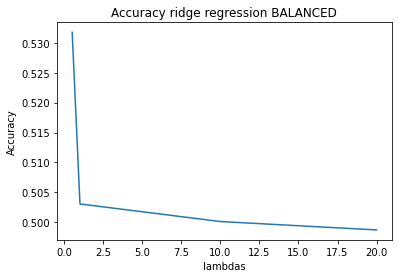

In [36]:
accuracies = list(pd_filled_RR['acc'].values) 
plt.plot(lambdas,accuracies)
plt.ylabel('Accuracy')
plt.xlabel('lambdas')
plt.title('Accuracy ridge regression BALANCED')
plt.show()